### EE 421/521 Image Processing - Spring 2019-20

## Project 5 - Resampling of Images

#### Submission deadline: 29 March 2021

In this project, you will implement the following:

1. Decimate and interpolate an image
2. Change the sampling rate of an image by a fractional factor

**This project will be graded for both EE 421 (HW4) and EE 521 (HW4) students.**

*Copyright (c) 2021 by Arif Tanju Erdem*

************************************
Neva Yaren Bulut
************************************

In [1]:
# import necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

# signal processing operations
from scipy import signal
from scipy.linalg import circulant

# mathematical calculations
import math
import cmath

# DFT calculations
from scipy import fftpack as ft

In [2]:
# my function to round image data to nearest integer, then
# truncate to range [0, 255], and then set data type to uint8

def my_imgTruncate(img):
    
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

# end of function

In [3]:
# display an image in original size

def my_display_actual_size(img, str_caption):

    height, width = img.shape

    # determine a figure size big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc.
    margin = 0.05
    dpi = 80
    figsize = (1.0+margin)*height/dpi, (1.0+margin)*width/dpi

    # define the figure
    fig = plt.figure(figsize=figsize, dpi=dpi)
    
    # make the axis the right size
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    # display the image
    ax.imshow(img, cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.title(str_caption)
    plt.show()
    
    return

# end of function

Image width is 256 and image height is 256.


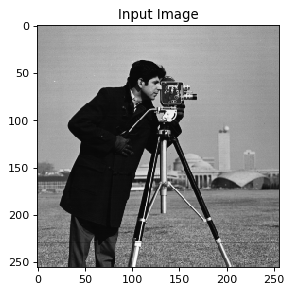

In [4]:
# STEP 1 Pick an image

# set image folder
image_folder = r'D:\yeni\Dersler\EE421-imageprocessing\images'

# read input image 
image_file = r'/cameraman.tiff'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

if imgRGB.ndim == 3:
    # calculate the luminance image
    img = my_imgLuminance(imgRGB)
else:
    img = imgRGB

height, width = img.shape
print("Image width is {} and image height is {}.".format(width, height))

# display image in actual size
my_display_actual_size(img,'Input Image')

In [5]:
# calculate the RMSE between two images

def my_RMSE(img1, img2):
    
    assert img1.ndim == img2.ndim
    assert img1.size == img2.size
    
    return math.sqrt(((img1 - img2)**2).sum() / img1.size)
    
# end of function

In [6]:
# cubic spline LP filter

# calculate cubic spline filter coefficients given filter factor
def my_cubic_filter(n_filter):
    
    assert n_filter >= 1
    
    size_filter = n_filter * 4 - 1
    
    filter_cubic = np.zeros((size_filter,))
    
    filter_cubic[size_filter//2] = 1.0
    
    for i in range(1,n_filter):
        x = i/n_filter
        filter_cubic[size_filter//2 + i] = 1.0 - x**2

    for i in range(n_filter+1, n_filter*2):
        x = i/n_filter
        filter_cubic[size_filter//2 + i] = -2*(x-1)*(x-2)**2
    
    filter_cubic[:size_filter//2] = filter_cubic[-1:size_filter//2:-1]

    return filter_cubic

# end of function

In [7]:
# STEP 2 Calculate 1-D cubic spline low-pass filter coefficients

# set effective filter size
n_filter = 4

# calculate filter coefficients
filter_cubic = my_cubic_filter(n_filter)

print("effective filter size: ", n_filter)
print("filter support size: ", filter_cubic.size)
print("1-D filter coefficients: ", filter_cubic)
print("sum of 1-D filter coefficients: ", filter_cubic.sum())

# calculate 2-D filter coefficients (separable filter)
filter_cubic_2D = np.outer(filter_cubic, filter_cubic)

print("2-D filter coefficients: \n", filter_cubic_2D)
print("sum of 2-D filter coefficients: ", filter_cubic_2D.sum())

effective filter size:  4
filter support size:  15
1-D filter coefficients:  [-0.09375 -0.25    -0.28125  0.       0.4375   0.75     0.9375   1.
  0.9375   0.75     0.4375   0.      -0.28125 -0.25    -0.09375]
sum of 1-D filter coefficients:  4.0
2-D filter coefficients: 
 [[ 0.00878906  0.0234375   0.02636719 -0.         -0.04101562 -0.0703125
  -0.08789062 -0.09375    -0.08789062 -0.0703125  -0.04101562 -0.
   0.02636719  0.0234375   0.00878906]
 [ 0.0234375   0.0625      0.0703125  -0.         -0.109375   -0.1875
  -0.234375   -0.25       -0.234375   -0.1875     -0.109375   -0.
   0.0703125   0.0625      0.0234375 ]
 [ 0.02636719  0.0703125   0.07910156 -0.         -0.12304688 -0.2109375
  -0.26367188 -0.28125    -0.26367188 -0.2109375  -0.12304688 -0.
   0.07910156  0.0703125   0.02636719]
 [-0.         -0.         -0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.         -0.         -0.        ]
 [-0.04101562 -0.109375 

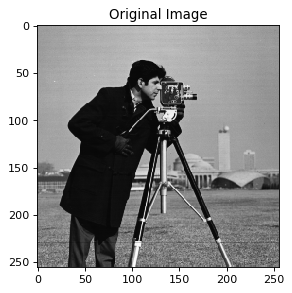

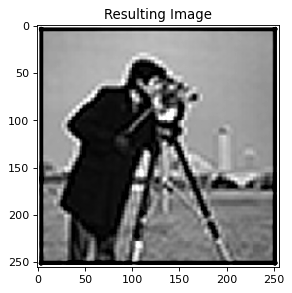

In [8]:
# STEP 2 Decimate and interpolate an image

#---------------------------------------------------------------
# Low-pass filter the image by a factor of 4 in both directions
# using bicubic filter
#---------------------------------------------------------------

# ADD YOUR CODE BELOW

# downsampling factor
n_down = 4

# set filter coefficients
my_filter = my_cubic_filter(n_down)
my_filter_2D = np.outer(my_filter,my_filter)
my_filter_2D /= my_filter_2D.sum()

# low-pass (LP) filter image
img_dec = signal.convolve2d(img, my_filter_2D, mode='same', boundary='fill', fillvalue=128)

# round to nearest integer
img_dec = my_imgTruncate(img_dec)



#---------------------------------------------------------------
# Downsample the image by a factor of 4 in both directions
#---------------------------------------------------------------

# ADD YOUR CODE BELOW

# downsample image
img_dec = img_dec[::n_down,::n_down]


#---------------------------------------------------------------
# Upsample the image by a factor of 4 in both directions
#---------------------------------------------------------------

# ADD YOUR CODE BELOW

# upsampling factor
n_up = 4
height, width = img_dec.shape
img_up = np.zeros((height*n_up,width*n_up))
   
# upsample image
img_up[::n_up,::n_up] = img_dec

#---------------------------------------------------------------
# Low-pass filter the image by a factor of 4 in both directions
# using bicubic filter
#---------------------------------------------------------------

# ADD YOUR CODE BELOW

# set filter coefficients
n_up = 4
my_filter = my_cubic_filter(n_up)
my_filter_2D = np.outer(my_filter,my_filter)
# (note: there is no normalization of filter coefficients in the case of interpolation)

# 2D convolution
img_interp = signal.convolve2d(img_up, my_filter_2D, mode='same', boundary='fill', fillvalue=128)

# round to nearest integer
img_interp = my_imgTruncate(img_interp)


#---------------------------------------------------------------
# Display the resulting image and the original image side by side
#---------------------------------------------------------------

# ADD YOUR CODE BELOW
my_display_actual_size(img, 'Original Image')
my_display_actual_size(img_interp, 'Resulting Image')


In [160]:
# STEP 3 Demonstrate the importance of the order of interpolation and decimation

#---------------------------------------------------------------
# Calculate and print the RMSE between the original image and the image obtained in Step 2 above
#---------------------------------------------------------------

# ADD YOUR CODE BELOW
my_RMSE(img, img_interp)


7.552465417777082

In [161]:
# STEP 4 Decrease the size of the image by 33.33% horizontally
# while increasing its size by 50% vertically 

#---------------------------------------------------------------
# Squeeze the image horizontally by 33.33%
#---------------------------------------------------------------

# ADD YOUR CODE BELOW
# downsampling factor
i=math.modf(2/3)                              #I could not use fractional number
height, width = img.shape
# downsample image
img_down = img[::i,::i];

# display image
my_display_actual_size(img_down, 'Downsampled Image')

#---------------------------------------------------------------
# Stretch the resulting image vertically by 50% 
#---------------------------------------------------------------

# ADD YOUR CODE BELOW

#---------------------------------------------------------------
# Display the resulting image
#---------------------------------------------------------------

# ADD YOUR CODE BELOW



TypeError: slice indices must be integers or None or have an __index__ method

*STEP 5 Comments on the results*

*ADD YOUR COMMENTS HERE*

Explain why in Step 2 above the decimated and then interpolated image is not the same as the original image.

in Step 2, we first decimated the original image. Image size got smaller. In order to prevent aliasing, we removed high frequency by low pass filtering. That's why the resulting image looks different than the original image.
